In [ ]:
import os
import numpy as np
import pandas as pd
import kagglehub

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

d:\Moringa\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#1 Load Data (KaggleHub)
path = kagglehub.dataset_download("becksddf/churn-in-telecoms-dataset")
print("Path to dataset files:", path)

print("Files in folder:", os.listdir(path))

csv_file = None
for f in os.listdir(path):
    if f.endswith(".csv"):
        csv_file = f
        break

if csv_file is None:
    raise FileNotFoundError("No CSV found in downloaded KaggleHub folder.")

df = pd.read_csv(os.path.join(path, csv_file))
df.head()

100%|██████████| 116k/116k [00:00<00:00, 181kB/s]

Extracting files...
Path to dataset files: C:\Users\Kaunda\.cache\kagglehub\datasets\becksddf\churn-in-telecoms-dataset\versions\1
Files in folder: ['bigml_59c28831336c6604c800002a.csv']


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#2 Basic Checks /Understanding
print(df.shape)
print(df.info())
print(df['churn'].value_counts(normalize=True))

df.describe(include='all')

(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


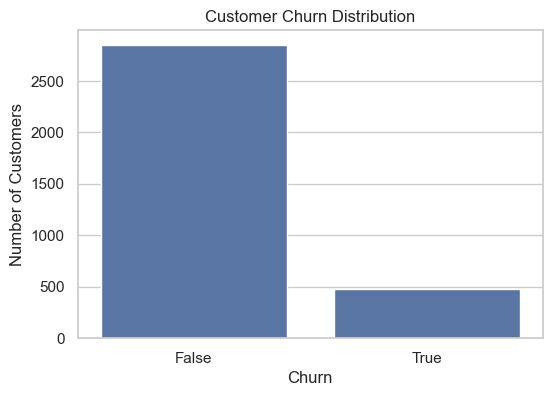

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
#1 - Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

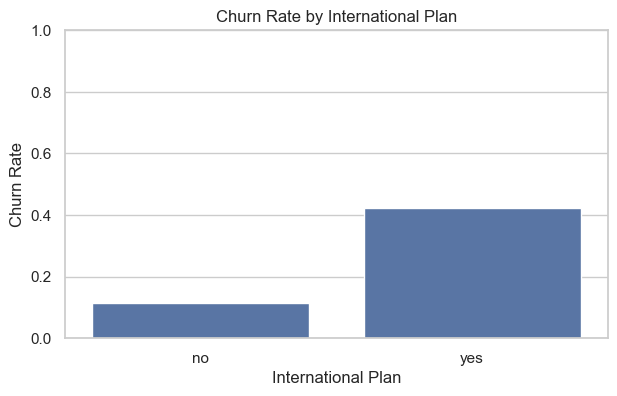

In [ ]:
churn_by_plan = (
    df.groupby(['international plan', 'churn'])
      .size()
      .unstack(fill_value=0)
)

#Convert counts to proportions
churn_by_plan_prop = churn_by_plan.div(churn_by_plan.sum(axis=1), axis=0)

#Keep only churn = True
churn_true = churn_by_plan_prop[True].reset_index(name='proportion')

plt.figure(figsize=(7, 4))
sns.barplot(
    data=churn_true,
    x='international plan',
    y='proportion'
)
plt.title("Churn Rate by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.show()

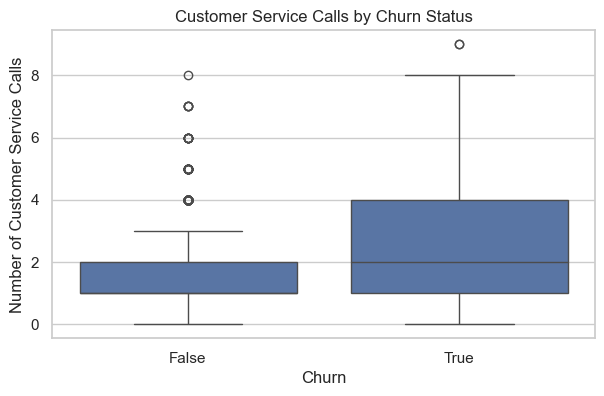

In [ ]:
#3 - Customer Service Calls vs Churn
plt.figure(figsize=(7, 4))
sns.boxplot(
    data=df,
    x='churn',
    y='customer service calls'
)
plt.title("Customer Service Calls by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Number of Customer Service Calls")
plt.show()

In [8]:
#3 - Define Target and Features
if "phone number" in df.columns:
    df = df.drop(columns=["phone number"])
X = df.drop(columns=["churn"])
y = df["churn"].astype(int)

In [ ]:
#4 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [11]:
#5 - Preprocessing
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

if "area code" in X_train.columns and "area code" not in categorical_cols:
    categorical_cols.append("area code")

numeric_cols = [c for c in X_train.columns if c not in categorical_cols]

preprocess_for_lr = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder="drop"
)
preprocess_for_tree = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ],
    remainder="drop"
)

In [12]:
#6 - Helper - Evaluate Model
def evaluate_classifier(model, X_tr, y_tr, X_te, y_te, positive_label=1):
    """
    Prints key classification metrics for both train and test sets.
    Primary metric for churn is often Recall (catch churners),
    but we report a few and you can justify your primary choice in markdown.
    """
    #Predictions
    yhat_tr = model.predict(X_tr)
    yhat_te = model.predict(X_te)

    #Probabilities (for ROC-AUC if available)
    yproba_tr = None
    yproba_te = None
    if hasattr(model, "predict_proba"):
        yproba_tr = model.predict_proba(X_tr)[:, 1]
        yproba_te = model.predict_proba(X_te)[:, 1]

    def metrics_block(y_true, y_pred, y_proba=None, label="SET"):
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=positive_label, zero_division=0)
        rec = recall_score(y_true, y_pred, pos_label=positive_label, zero_division=0)
        f1 = f1_score(y_true, y_pred, pos_label=positive_label, zero_division=0)
        print(f"\n--- {label} METRICS ---")
        print(f"Accuracy : {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1-score : {f1:.4f}")
        if y_proba is not None:
            auc = roc_auc_score(y_true, y_proba)
            print(f"ROC-AUC  : {auc:.4f}")

    metrics_block(y_tr, yhat_tr, yproba_tr, label="TRAIN")
    metrics_block(y_te, yhat_te, yproba_te, label="TEST")

    print("\nConfusion Matrix (TEST):")
    print(confusion_matrix(y_te, yhat_te))

    print("\nClassification Report (TEST):")
    print(classification_report(y_te, yhat_te))

In [14]:
#MODEL 1 — BASELINE (Interpretable)
lr_baseline = Pipeline(
    steps=[
        ("preprocess", preprocess_for_lr),
        ("model", LogisticRegression(max_iter=2000, solver="liblinear"))
    ]
)
lr_baseline.fit(X_train, y_train)

print("BASELINE: Logistic Regression")
evaluate_classifier(lr_baseline, X_train, y_train, X_test, y_test)

BASELINE: Logistic Regression

--- TRAIN METRICS ---
Accuracy : 0.8698
Precision: 0.6226
Recall   : 0.2565
F1-score : 0.3633
ROC-AUC  : 0.8433

--- TEST METRICS ---
Accuracy : 0.8606
Precision: 0.5435
Recall   : 0.2577
F1-score : 0.3497
ROC-AUC  : 0.8089

Confusion Matrix (TEST):
[[549  21]
 [ 72  25]]

Classification Report (TEST):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.54      0.26      0.35        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.64       667
weighted avg       0.83      0.86      0.84       667



In [15]:
#Model 2 — TUNED VERSION of baseline
lr_tuned_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess_for_lr),
        ("model", LogisticRegression(max_iter=3000, solver="liblinear"))
    ]
)

lr_param_grid = {
    "model__C": [0.01, 0.1, 1, 10, 50],
    "model__penalty": ["l1", "l2"]
}
lr_grid = GridSearchCV(
    estimator=lr_tuned_pipe,
    param_grid=lr_param_grid,
    scoring="recall",
    cv=5,
    n_jobs=-1
)
lr_grid.fit(X_train, y_train)

print("TUNED: Logistic Regression (GridSearchCV)")
print("Best params:", lr_grid.best_params_)
print("Best CV recall:", lr_grid.best_score_)

best_lr = lr_grid.best_estimator_
evaluate_classifier(best_lr, X_train, y_train, X_test, y_test)

TUNED: Logistic Regression (GridSearchCV)
Best params: {'model__C': 50, 'model__penalty': 'l2'}
Best CV recall: 0.2516150516150516

--- TRAIN METRICS ---
Accuracy : 0.8698
Precision: 0.6114
Recall   : 0.2772
F1-score : 0.3815
ROC-AUC  : 0.8438

--- TEST METRICS ---
Accuracy : 0.8606
Precision: 0.5417
Recall   : 0.2680
F1-score : 0.3586
ROC-AUC  : 0.8010

Confusion Matrix (TEST):
[[548  22]
 [ 71  26]]

Classification Report (TEST):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       570
           1       0.54      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.64       667
weighted avg       0.84      0.86      0.84       667



In [16]:
# MODEL 3 — Nonparametric / Ensemble (Meets rubric objective)
rf_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess_for_tree),
        ("model", RandomForestClassifier(random_state=42))
    ]
)

rf_param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 10],
    "model__min_samples_leaf": [1, 5]
}

rf_grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param_grid,
    scoring="recall",
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [None, 5, ...], 'model__min_samples_leaf': [1, 5], 'model__min_samples_split': [2, 10], 'model__n_estimators': [200, 400]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('num', ...)]"


In [18]:
print("ENSEMBLE: Random Forest (GridSearchCV)")
print("Best params:", rf_grid.best_params_)
print("Best CV recall:", rf_grid.best_score_)

best_rf = rf_grid.best_estimator_
evaluate_classifier(best_rf, X_train, y_train, X_test, y_test)

ENSEMBLE: Random Forest (GridSearchCV)
Best params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV recall: 0.6582750582750583

--- TRAIN METRICS ---
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC-AUC  : 1.0000

--- TEST METRICS ---
Accuracy : 0.9340
Precision: 0.9077
Recall   : 0.6082
F1-score : 0.7284
ROC-AUC  : 0.8966

Confusion Matrix (TEST):
[[564   6]
 [ 38  59]]

Classification Report (TEST):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       570
           1       0.91      0.61      0.73        97

    accuracy                           0.93       667
   macro avg       0.92      0.80      0.85       667
weighted avg       0.93      0.93      0.93       667



In [ ]:
#7 - Choose Final Model
def test_recall(model, X_te, y_te):
    preds = model.predict(X_te)
    return recall_score(y_te, preds, pos_label=1, zero_division=0)
final_candidates = {
    "Baseline LR": lr_baseline,
    "Tuned LR": best_lr,
    "Tuned RF": best_rf
}
for name, model in final_candidates.items():
    print(f"{name} — Test Recall: {test_recall(model, X_test, y_test):.4f}")

#Example
final_model = best_rf 
y_pred = final_model.predict(X_test)

Baseline LR — Test Recall: 0.2577
Tuned LR — Test Recall: 0.2680
Tuned RF — Test Recall: 0.6082


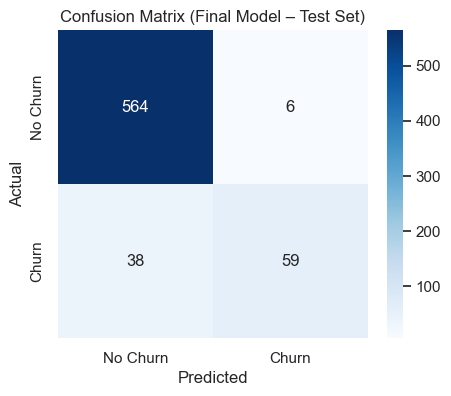

In [ ]:
# Model Evaluation Visualization
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)
plt.title("Confusion Matrix (Final Model – Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#8 - Feature Importance (Model Insight)
def get_feature_names(preprocessor, categorical_cols, numeric_cols):
    ohe = preprocessor.named_transformers_["cat"]
    cat_names = ohe.get_feature_names_out(categorical_cols)
    all_names = np.concatenate([cat_names, np.array(numeric_cols)])
    return all_names

pre = final_model.named_steps["preprocess"]
pre.fit(X_train)

feature_names = get_feature_names(pre, categorical_cols, numeric_cols)

In [22]:
if hasattr(final_model.named_steps["model"], "feature_importances_"):
    importances = final_model.named_steps["model"].feature_importances_
    fi = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values(
        "importance", ascending=False
    )
    print("\nTop 15 Feature Importances (Random Forest):")
    print(fi.head(15))

elif hasattr(final_model.named_steps["model"], "coef_"):
    coefs = final_model.named_steps["model"].coef_.ravel()
    fi = pd.DataFrame({"feature": feature_names, "coef": coefs}).sort_values(
        "coef", ascending=False
    )
    print("\nTop 15 Positive Coefficients (LogReg):")
    print(fi.head(15))

    print("\nTop 15 Negative Coefficients (LogReg):")
    print(fi.tail(15))


Top 15 Feature Importances (Random Forest):
                   feature  importance
62        total day charge    0.132954
60       total day minutes    0.126871
72  customer service calls    0.108728
65        total eve charge    0.052644
63       total eve minutes    0.050482
70        total intl calls    0.046719
69      total intl minutes    0.043792
71       total intl charge    0.038752
51   international plan_no    0.036545
52  international plan_yes    0.034351
66     total night minutes    0.033735
68      total night charge    0.032964
61         total day calls    0.032961
58          account length    0.029532
67       total night calls    0.028774


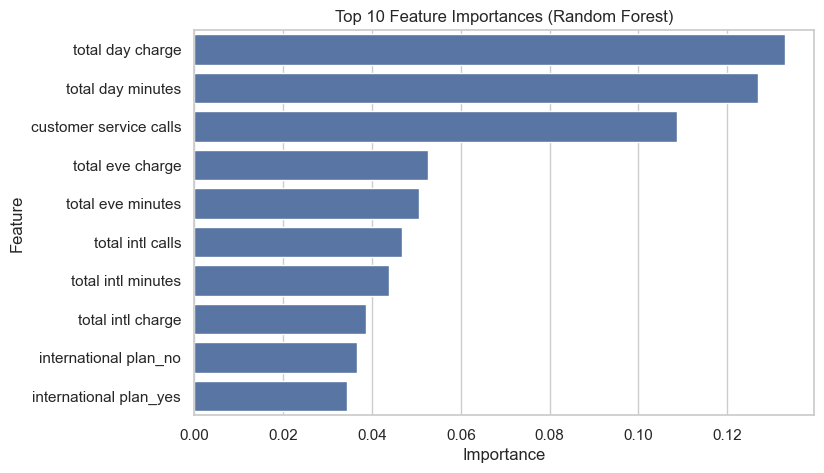

In [ ]:
preprocessor = final_model.named_steps["preprocess"]

ohe = preprocessor.named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(categorical_cols)

feature_names = np.r_[cat_features, np.array(numeric_cols)]

importances = final_model.named_steps["model"].feature_importances_

fi = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
      .sort_values("importance", ascending=False)
      .head(10)
)

plt.figure(figsize=(8, 5))
sns.barplot(data=fi, x="importance", y="feature")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()